# Project 2 - Prediction using Decision Tree Algorithm (Task 6)

To Create a Decision Tree Classifier and Visualise it Graphically

Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the Dataset

In [2]:
dataset = pd.read_csv(r'https://raw.githubusercontent.com/tanishqv010/GRIP/main/Project%202/Dataset.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = dataset[features]
y = dataset.Species

In [4]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

Splitting the given Dataset into Training Set and Test Set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
print(X_train)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
137            6.4           3.1            5.5           1.8
84             5.4           3.0            4.5           1.5
27             5.2           3.5            1.5           0.2
127            6.1           3.0            4.9           1.8
132            6.4           2.8            5.6           2.2
..             ...           ...            ...           ...
9              4.9           3.1            1.5           0.1
103            6.3           2.9            5.6           1.8
67             5.8           2.7            4.1           1.0
117            7.7           3.8            6.7           2.2
47             4.6           3.2            1.4           0.2

[120 rows x 4 columns]


In [8]:
print(X_test)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
114            5.8           2.8            5.1           2.4
62             6.0           2.2            4.0           1.0
33             5.5           4.2            1.4           0.2
107            7.3           2.9            6.3           1.8
7              5.0           3.4            1.5           0.2
100            6.3           3.3            6.0           2.5
40             5.0           3.5            1.3           0.3
86             6.7           3.1            4.7           1.5
76             6.8           2.8            4.8           1.4
71             6.1           2.8            4.0           1.3
134            6.1           2.6            5.6           1.4
51             6.4           3.2            4.5           1.5
73             6.1           2.8            4.7           1.2
54             6.5           2.8            4.6           1.5
63             6.1           2.9            4.7           1.4
37      

In [9]:
print(y_train)

137     Iris-virginica
84     Iris-versicolor
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
            ...       
9          Iris-setosa
103     Iris-virginica
67     Iris-versicolor
117     Iris-virginica
47         Iris-setosa
Name: Species, Length: 120, dtype: object


In [10]:
print(y_test)

114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
71     Iris-versicolor
134     Iris-virginica
51     Iris-versicolor
73     Iris-versicolor
54     Iris-versicolor
63     Iris-versicolor
37         Iris-setosa
78     Iris-versicolor
90     Iris-versicolor
45         Iris-setosa
16         Iris-setosa
121     Iris-virginica
66     Iris-versicolor
24         Iris-setosa
8          Iris-setosa
126     Iris-virginica
22         Iris-setosa
44         Iris-setosa
97     Iris-versicolor
93     Iris-versicolor
26         Iris-setosa
Name: Species, dtype: object


Training the Decision Tree Classifier Model

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Predicting the Test Set Results

In [12]:
y_pred = classifier.predict(X_test)
y_pred = pd.Series(data = y_pred, name = 'Predicted Species', index = y_test.index)
pd.concat([y_test, y_pred], axis = 1)

,Species,Predicted Species
114,Iris-virginica,Iris-virginica
62,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
100,Iris-virginica,Iris-virginica
40,Iris-setosa,Iris-setosa
86,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
71,Iris-versicolor,Iris-versicolor


Making the Confusion Matrix and Calculating the Accuracy Score

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
1.0


Visualising the Decision Tree

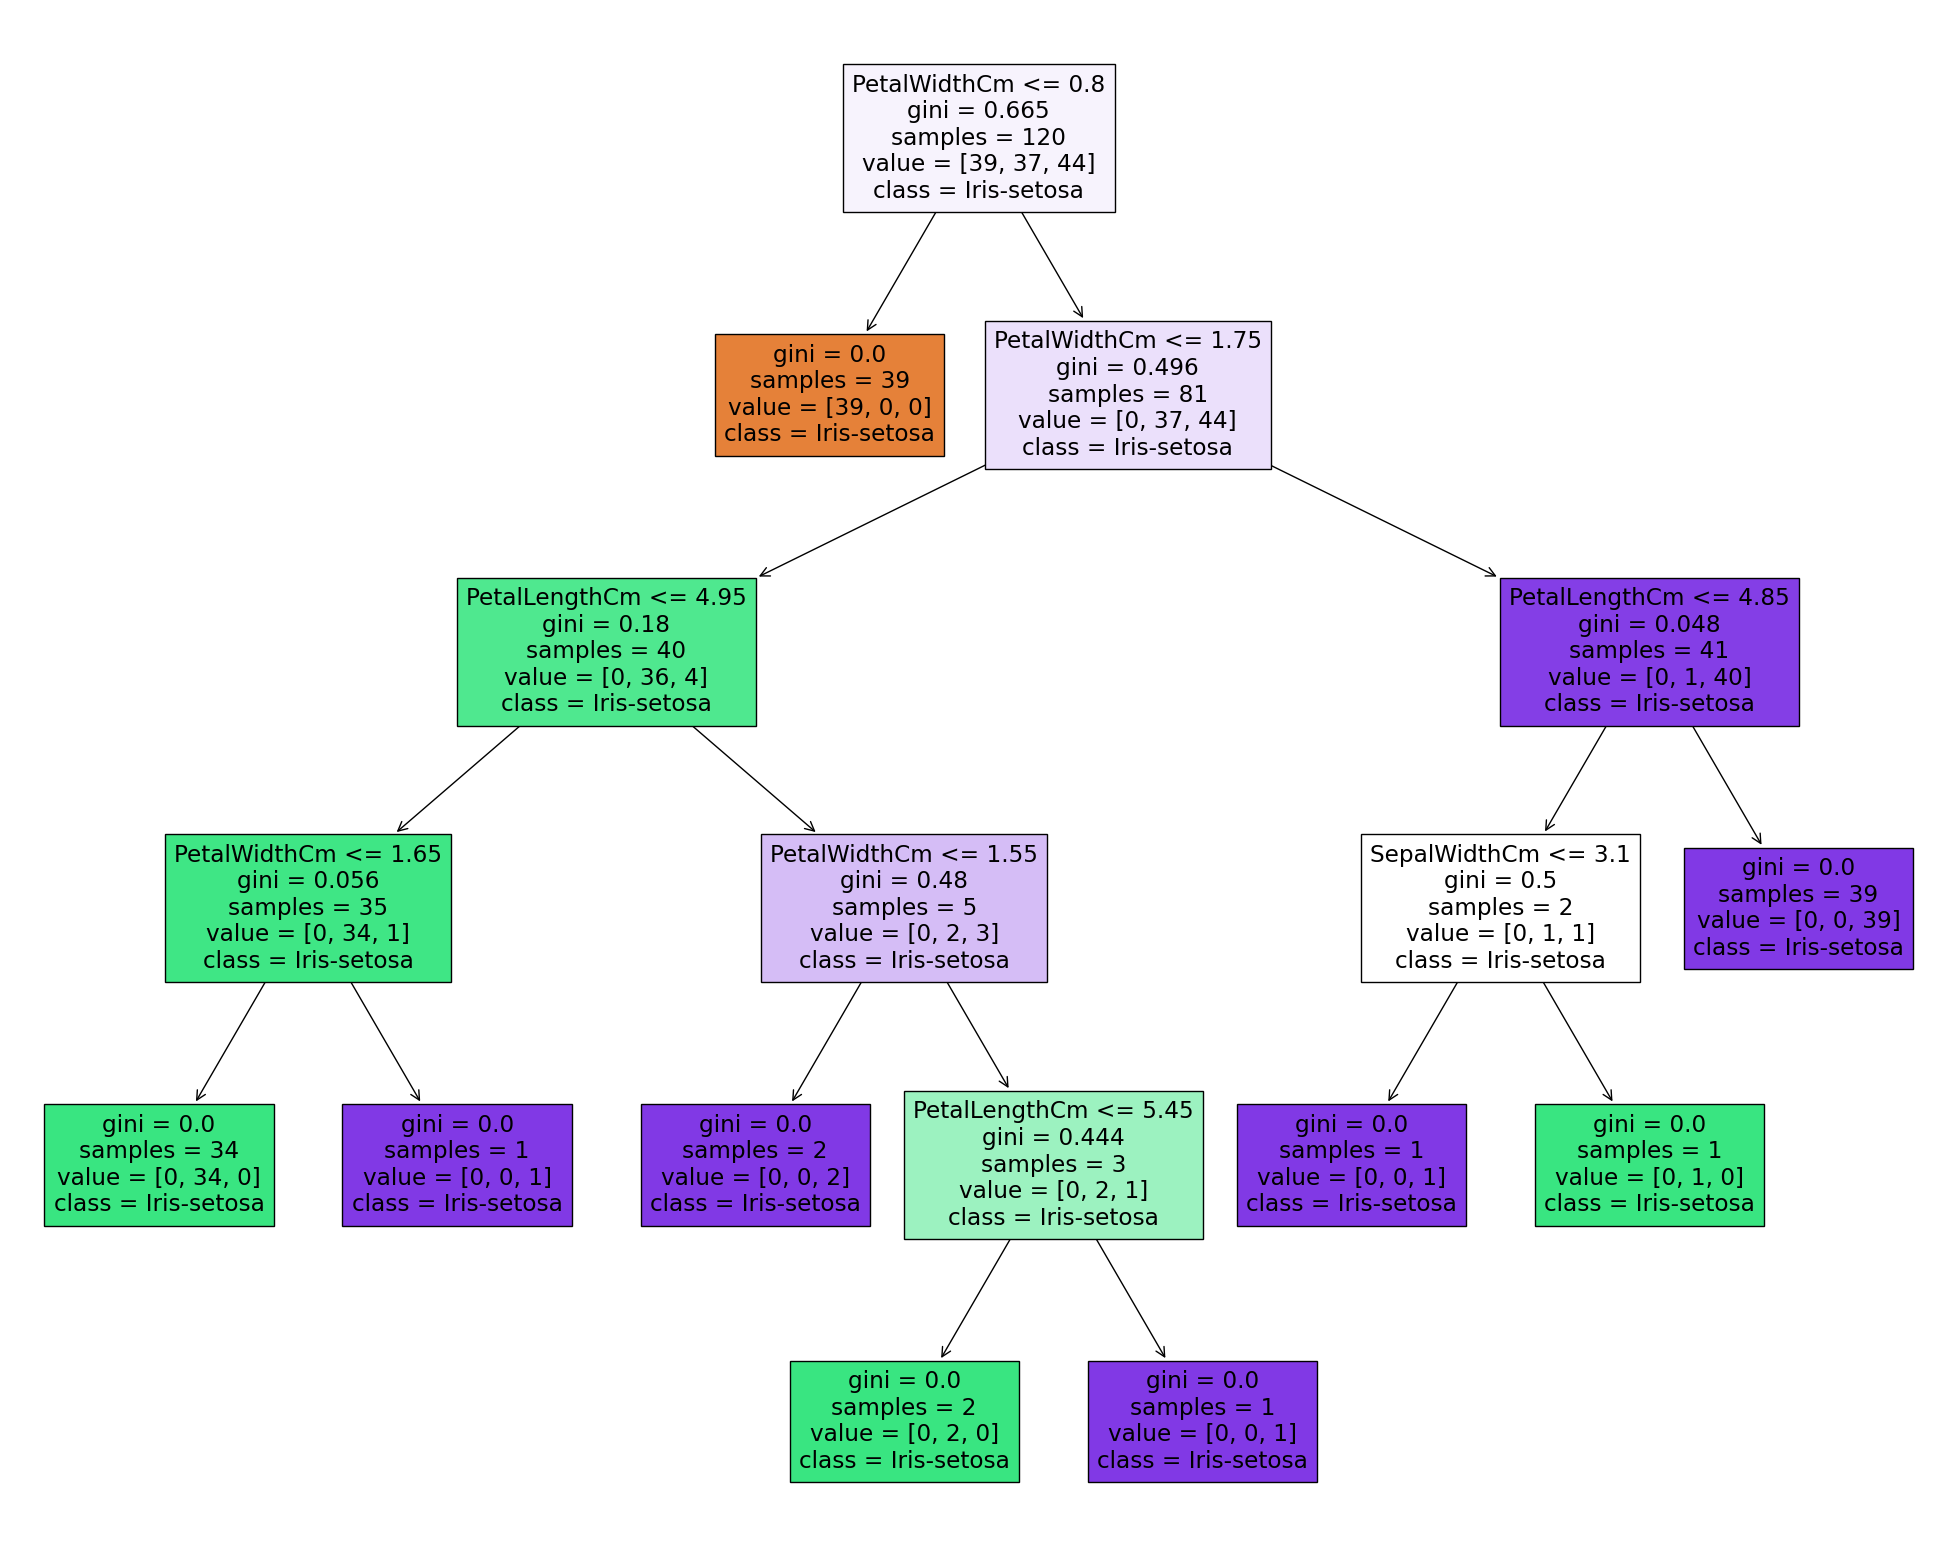

In [14]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (25, 20))
graph = plot_tree(classifier, feature_names = features, class_names = dataset.Species, filled = True)